In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
data = pd.read_csv('car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
data.shape

(301, 9)

In [6]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [7]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [8]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

In [12]:
data.duplicated().sum()

2

In [13]:
data.drop_duplicates(inplace = True)

In [14]:
data['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
brio                        10
fortuner                    10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [15]:
data['Fuel_Type'].value_counts()

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

In [16]:
data['Selling_type'].value_counts()

Dealer        193
Individual    106
Name: Selling_type, dtype: int64

In [17]:
data['Transmission'].value_counts()

Manual       260
Automatic     39
Name: Transmission, dtype: int64

In [18]:
data['Year'].value_counts()

2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

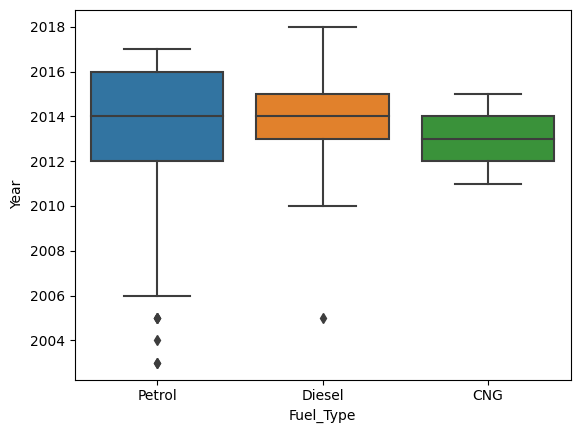

In [19]:
plt.figure()
sns.boxplot(x='Fuel_Type', y='Year', data=data)
plt.show()

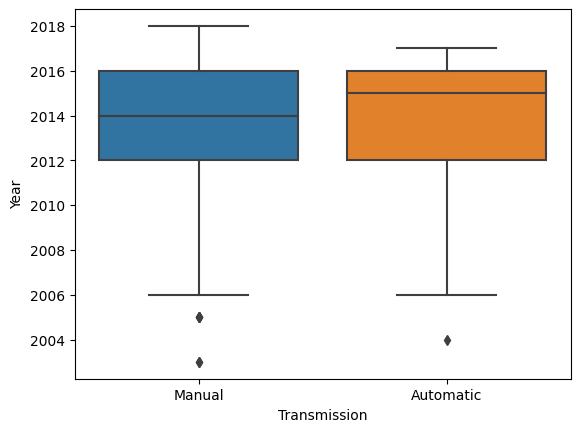

In [20]:
plt.figure()
sns.boxplot(x='Transmission', y='Year', data=data)
plt.show()

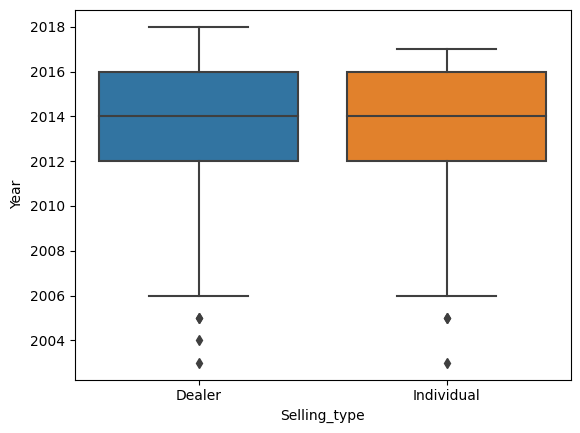

In [21]:
plt.figure()
sns.boxplot(x='Selling_type', y='Year', data=data)
plt.show()

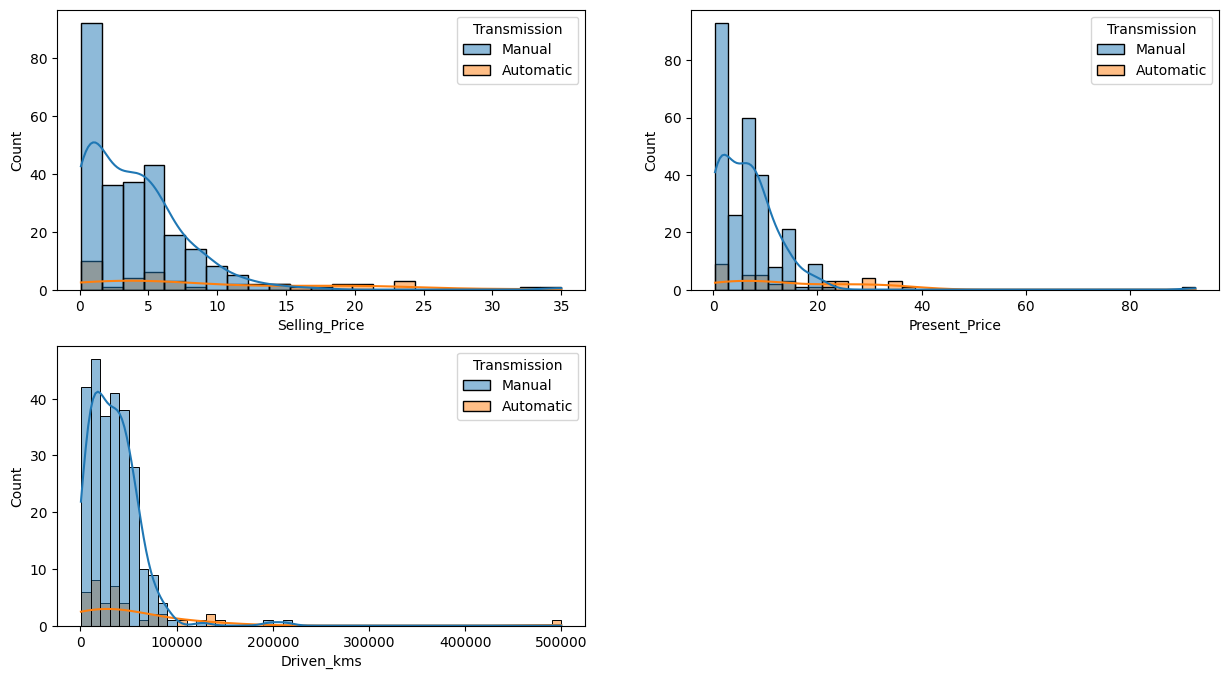

In [22]:
plt.figure(figsize = (15,8))
for i,z in enumerate(['Selling_Price', 'Present_Price','Driven_kms']):
    plt.subplot(2,2,i+1)
    sns.histplot(data = data, x = z,kde = True,hue = 'Transmission')
plt.show()

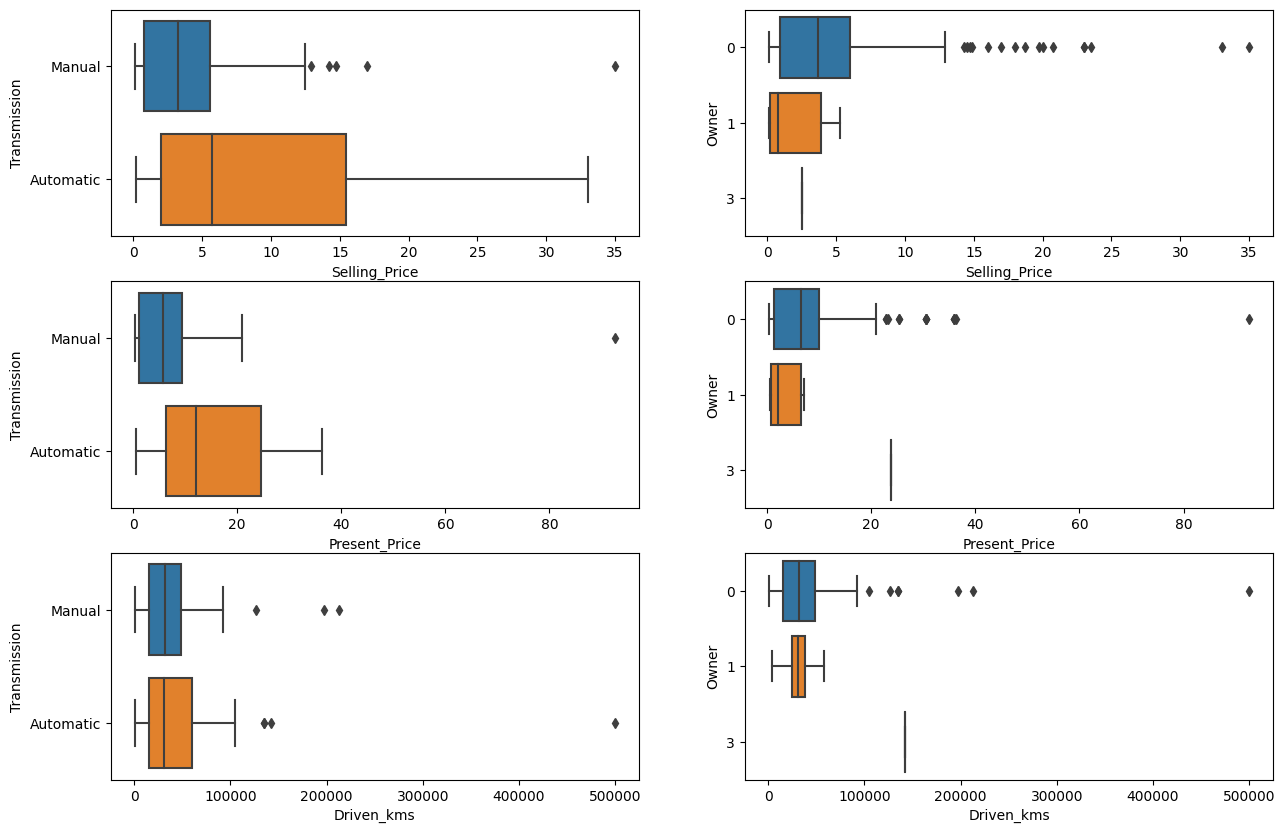

In [23]:
plt.figure(figsize = (15,10))
for i,col in enumerate(['Selling_Price','Present_Price', 'Driven_kms']):
    for j,col2 in enumerate(['Transmission', 'Owner']):
        plt.subplot(3,2,i * 2 + j + 1)
        sns.boxplot(data = data, y = col2,x = col,orient = 'h')

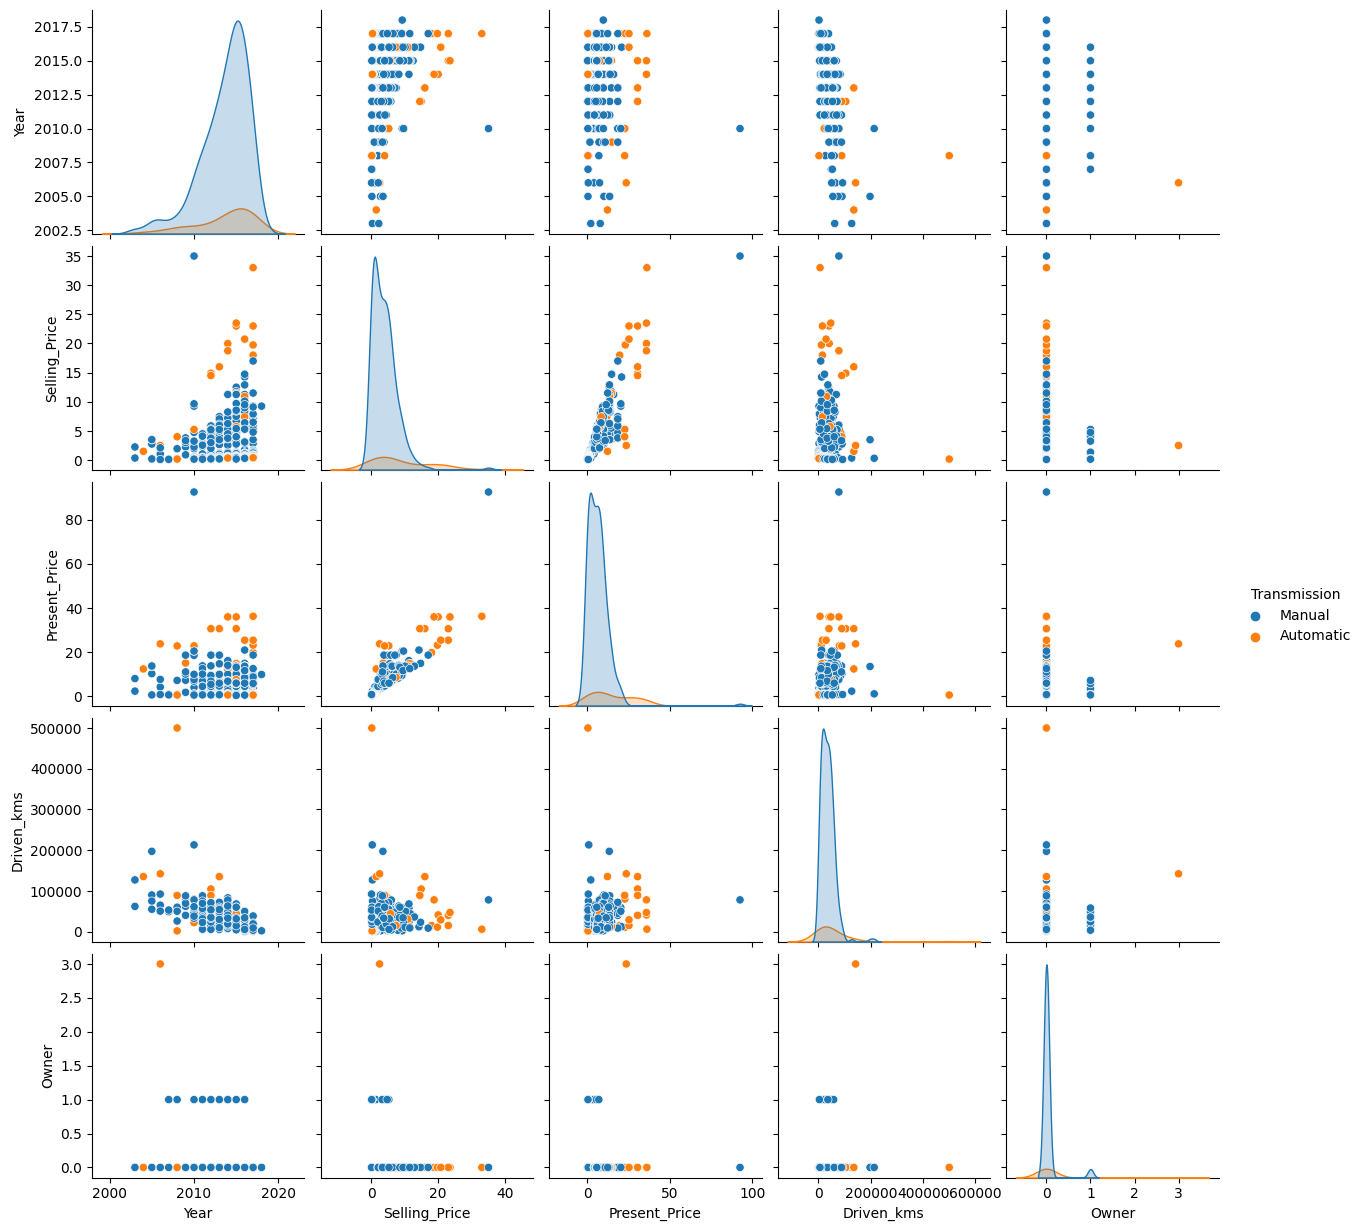

In [24]:
sns.pairplot(data = data , hue = 'Transmission')

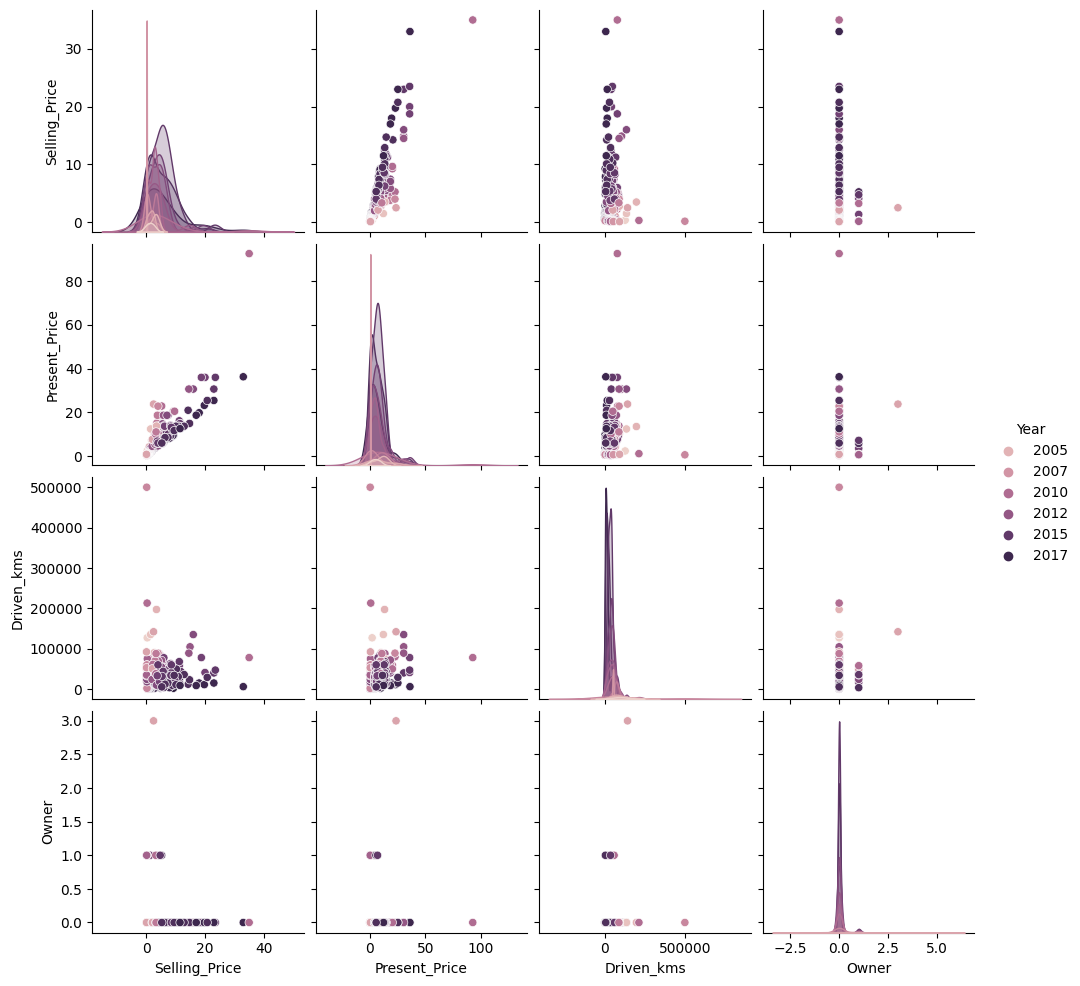

In [25]:
sns.pairplot(data = data , hue = 'Year')

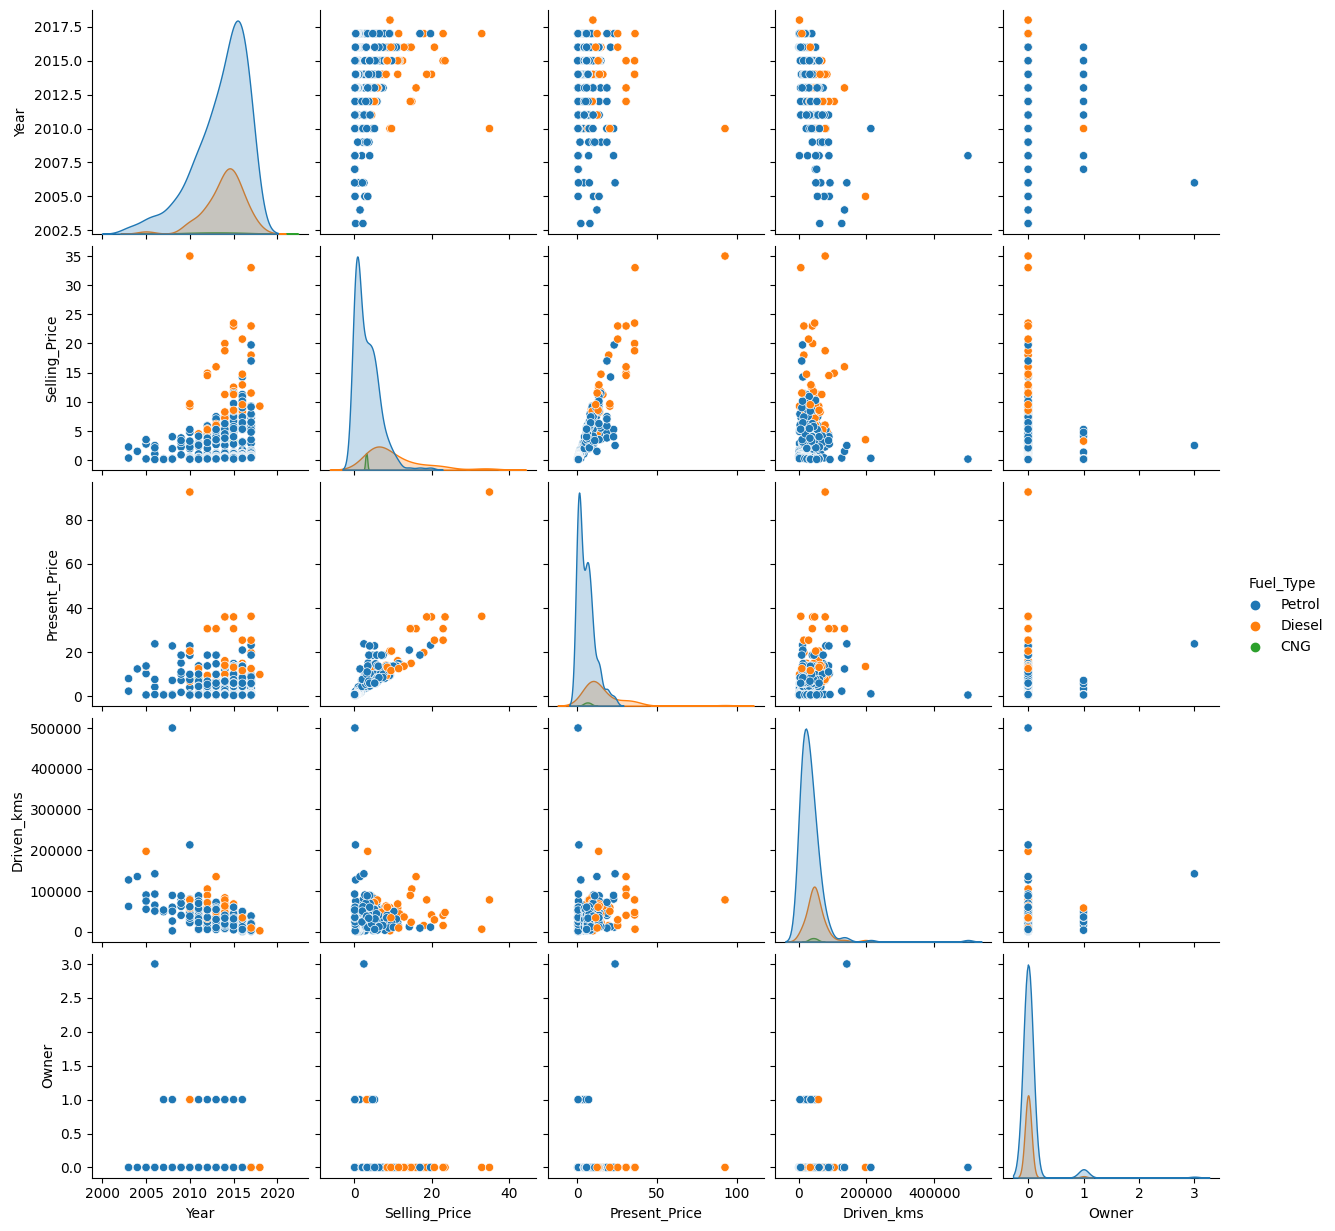

In [26]:
sns.pairplot(data = data , hue = 'Fuel_Type')

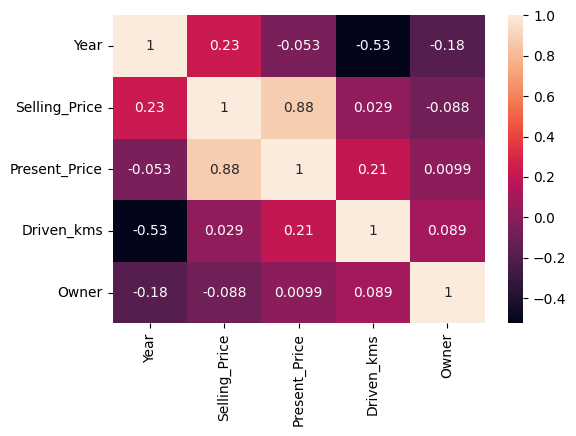

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [28]:
data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [29]:
X = data.drop(['Car_Name','Selling_Price','Selling_type'],axis=1)
Y = data['Selling_Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [30]:
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression()

In [31]:
predictions = lin_model.predict(X_test)
training_data_prediction = lin_model.predict(X_train)
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8915402300437291


In [32]:
test_data = lin_model.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data)
print("R squared Error : ", error_score)

R squared Error :  0.7450924175028892


In [33]:
lass_model = Lasso()
lass_model.fit(X_train,Y_train)

Lasso()

In [34]:
training_data = lass_model.predict(X_train)
error_score = metrics.r2_score(Y_train, training_data)
print("R squared Error : ", error_score)

R squared Error :  0.8668358571627193


In [35]:
test_data = lass_model.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data)
print("R squared Error : ", error_score)

R squared Error :  0.702331545429969
